In [1]:
import requests
import json

In [33]:
if __name__ == "__main__":
    website_url = "https://file.notion.so/f/s/98b0fa4b-2a85-40e0-af20-5a2785c55c92/Untitled.json?id=b6059ad3-5ee5-4f32-84b6-b03e68bdca98&table=block&spaceId=ca71608c-1cc3-4167-857a-24da97c78717&expirationTimestamp=1691344800000&signature=THPqOog3pSdP1mrDG0jd78-JwvA0KZiXz4hcZpeD4V0&downloadName=nested_data.json"  # Replace this with the URL of the JSON file you want to import
    json_data = ('import_json_from_website(https://file.notion.so/f/s/98b0fa4b-2a85-40e0-af20-5a2785c55c92/Untitled.json?id=b6059ad3-5ee5-4f32-84b6-b03e68bdca98&table=block&spaceId=ca71608c-1cc3-4167-857a-24da97c78717&expirationTimestamp=1691344800000&signature=THPqOog3pSdP1mrDG0jd78-JwvA0KZiXz4hcZpeD4V0&downloadName=nested_data.json')
    if json_data:
        # Do whatever you want with the JSON data
        print("JSON data successfully imported:")
        print(json_data)
    else:
        print("Failed to import JSON data.")

JSON data successfully imported:
import_json_from_website(https://file.notion.so/f/s/98b0fa4b-2a85-40e0-af20-5a2785c55c92/Untitled.json?id=b6059ad3-5ee5-4f32-84b6-b03e68bdca98&table=block&spaceId=ca71608c-1cc3-4167-857a-24da97c78717&expirationTimestamp=1691344800000&signature=THPqOog3pSdP1mrDG0jd78-JwvA0KZiXz4hcZpeD4V0&downloadName=nested_data.json


In [49]:
df = pd.DataFrame(data)

In [55]:
print("Original DataFrame:")
print(df)

Original DataFrame:
    Name  Age Department  Salary
0   John   30         HR   50000
1   Jane   28         IT   60000
2    Bob   35    Finance   55000
3  Alice   32         HR   52000


In [56]:
filtered_df = df[df['Salary'] > 52000]

In [57]:
filtered_df

,Name,Age,Department,Salary
1,Jane,28,IT,60000
2,Bob,35,Finance,55000


In [58]:
sorted_df = df.sort_values(by='Age', ascending=True)

In [59]:
sorted_df

,Name,Age,Department,Salary
1,Jane,28,IT,60000
0,John,30,HR,50000
3,Alice,32,HR,52000
2,Bob,35,Finance,55000


In [60]:
# Group and aggregate data - Example: Calculate average salary per department
grouped_df = df.groupby('Department')['Salary'].mean().reset_index()

In [61]:
grouped_df

,Department,Salary
0,Finance,55000.0
1,HR,51000.0
2,IT,60000.0


# 2.

In [71]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import networkx as nx

In [75]:
# Connect to the SQLite database
conn = sqlite3.connect("normalized_data.db")

# Define the database engine for SQLAlchemy
engine = create_engine("sqlite:///normalized_data.db")

# Get the list of tables from the database
tables = engine.table_names()

C:\Users\Pardeep\AppData\Local\Temp\ipykernel_13804\2503850030.py:8: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  tables = engine.table_names()


In [76]:
# Get the foreign key relationships between the tables
relationships = []
for table in tables:
    foreign_keys = engine.execute(f"PRAGMA foreign_key_list({table})").fetchall()
    for fk in foreign_keys:
        relationships.append((table, fk["table"], fk["from"], fk["to"]))

In [77]:
# Create a graph for the ERD
G = nx.DiGraph()

In [78]:
G


In [79]:
# Add nodes for each table
for table in tables:
    G.add_node(table)


In [80]:
# Add edges for relationships between tables
for rel in relationships:
    G.add_edge(rel[0], rel[1], from_column=rel[2], to_column=rel[3])

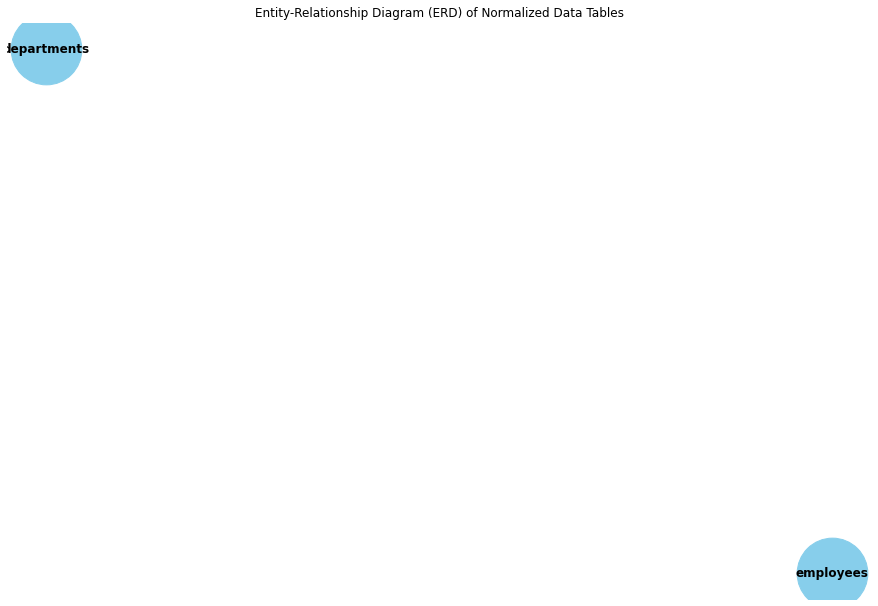

In [81]:
# Draw the ERD
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(n1, n2): f"{data['from_column']}->{data['to_column']}" for n1, n2, data in G.edges(data=True)})
plt.title("Entity-Relationship Diagram (ERD) of Normalized Data Tables")
plt.show()